# Audio Processing in Python



# Some Terminologies

Before starting, let us understand some terminologies related to audio and signal processing which will help in understanding and following this notebook in a better way.

* Analog speech signal : The speech which usually is uttered by humans and is propogated through air.
* Digital speech signal : The speech (in terms of samples) after performing analog-to-digital conversion using an ADC device. In this form, speech signal is in form of digitized samples.
* Frequency of a signal : The number of cycles a signal repeats in 1 second duration.
* Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.

### Processing a Noisy and Clean Signal

- There are two noisy and clean signals in the same folder
- Generate MFCC of both the Signals and report the differences 

In [3]:
import librosa

clean_signal_path = r'C:\Users\Akshat\Desktop\ACM Machine Learning\Week 3\Clean-Signal.wav'
noisy_signal_path = r'C:\Users\Akshat\Desktop\ACM Machine Learning\Week 3\Noisy-Signal.wav'

clean_signal, sr_clean = librosa.load(clean_signal_path, sr=None)
noisy_signal, sr_noisy = librosa.load(noisy_signal_path, sr=None)


In [4]:
import librosa.display
import matplotlib.pyplot as plt

def compute_mfcc(signal, sr, n_mfcc=13):
    return librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

mfcc_clean = compute_mfcc(clean_signal, sr_clean)
mfcc_noisy = compute_mfcc(noisy_signal, sr_noisy)


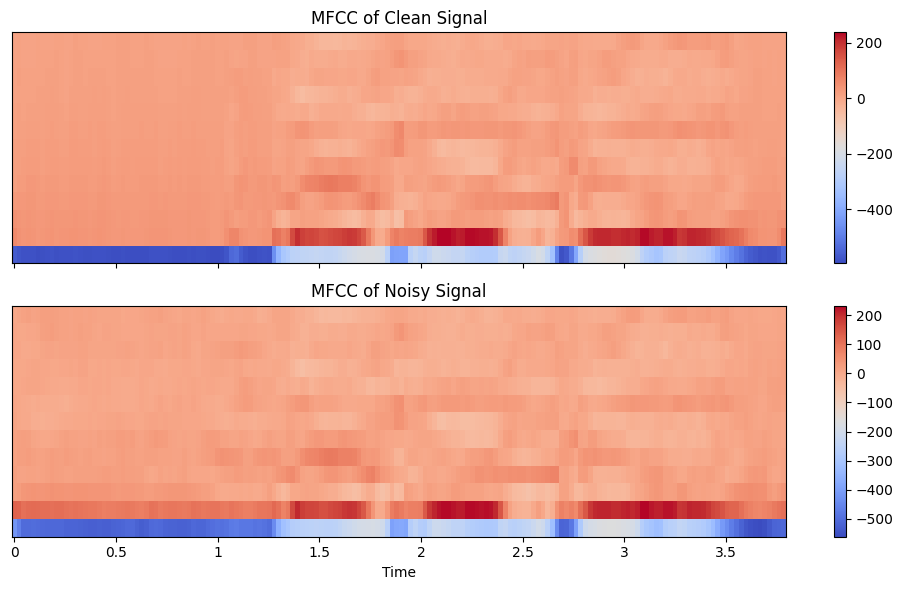

In [6]:
def plot_mfcc(mfcc, title, ax):
    img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
    ax.set_title(title)
    ax.label_outer()
    return img

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

img_clean = plot_mfcc(mfcc_clean, 'MFCC of Clean Signal', axs[0])
img_noisy = plot_mfcc(mfcc_noisy, 'MFCC of Noisy Signal', axs[1])

plt.colorbar(img_clean, ax=axs[0])
plt.colorbar(img_noisy, ax=axs[1])

plt.tight_layout()
plt.show()


In [8]:
import numpy as np

def mfcc_statistics(mfcc):
    mean_mfcc = np.mean(mfcc, axis=1)
    var_mfcc = np.var(mfcc, axis=1)
    return mean_mfcc, var_mfcc

mean_mfcc_clean, var_mfcc_clean = mfcc_statistics(mfcc_clean)
mean_mfcc_noisy, var_mfcc_noisy = mfcc_statistics(mfcc_noisy)

print("MFCC Mean for Clean Signal:", mean_mfcc_clean)
print("MFCC Mean for Noisy Signal:", mean_mfcc_noisy)

print("MFCC Variance for Clean Signal:", var_mfcc_clean)
print("MFCC Variance for Noisy Signal:", var_mfcc_noisy)

MFCC Mean for Clean Signal: [-400.41855     102.394485     10.470034     25.018925     23.615515
    8.740903      4.680942     21.438301      2.6346135    -0.82052577
    3.1148038     4.9494925     2.948112  ]
MFCC Mean for Noisy Signal: [-367.76266    126.11772     10.656115    22.120779    21.972944
    8.43604     -1.4469066   16.65211      0.7107679   -2.6737812
    4.0363216    5.0013638    3.104083 ]
MFCC Variance for Clean Signal: [26358.848    6658.965     811.9918    428.6592    424.07797   424.24838
   420.5873    122.59057   255.35806   243.25102   140.4348    120.46455
   211.63274]
MFCC Variance for Noisy Signal: [17464.541    4203.103     800.1225    382.51105   474.804     325.40164
   305.05237   196.18932   194.38387   170.12823   141.59357   121.56618
   206.60657]


### Trimming and Processing the Signal 
- The >Example.wav file contains is of a very large length. 
- Plot the MFCC
- Trim the first 4 Seconds of Audio and plot the MFCC 
- Observe the Changes



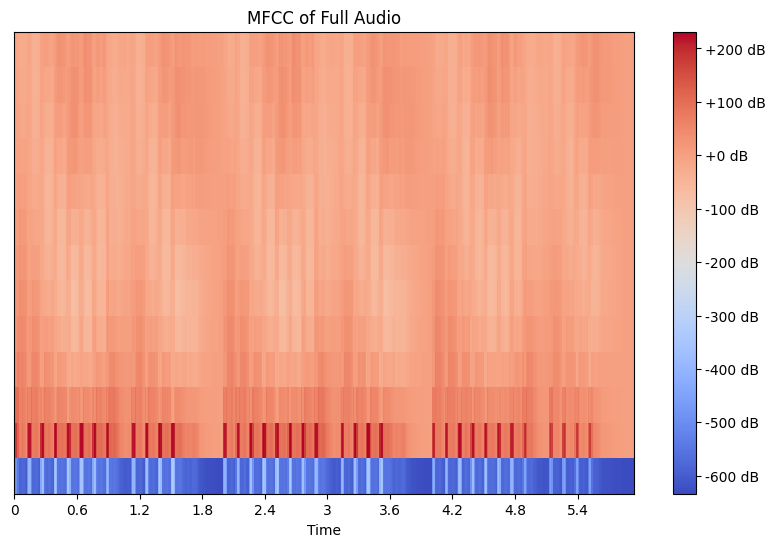

In [10]:
file_path = r'C:\Users\Akshat\Desktop\ACM Machine Learning\Week 3\Example.wav'
full_audio, sr = librosa.load(file_path, sr=None)

mfcc_full = librosa.feature.mfcc(y=full_audio, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_full, x_axis='time', sr=sr)
plt.title('MFCC of Full Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()

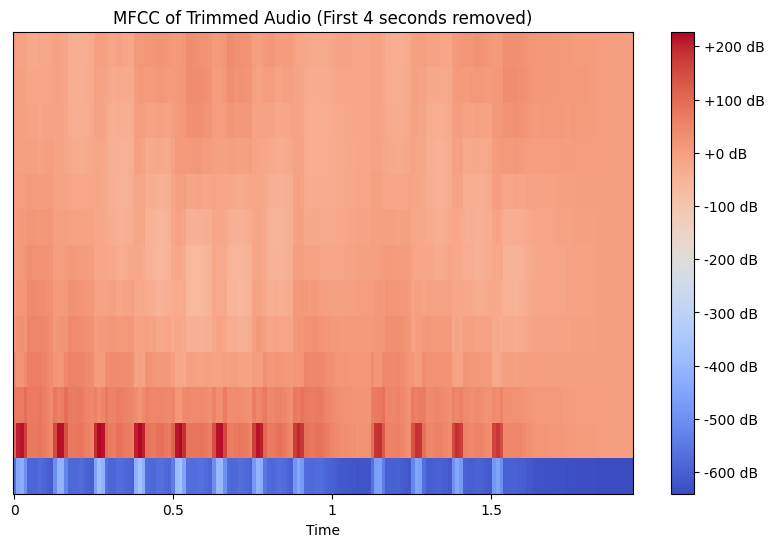

In [12]:
# Define the duration to trim (4 seconds)
duration_to_trim = 4
samples_to_trim = int(duration_to_trim * sr)

# Trim the first 4 seconds
trimmed_audio = full_audio[samples_to_trim:]

# Compute MFCCs for the trimmed audio
mfcc_trimmed = librosa.feature.mfcc(y=trimmed_audio, sr=sr, n_mfcc=13)

# Plot MFCCs for the trimmed audio
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_trimmed, x_axis='time', sr=sr)
plt.title('MFCC of Trimmed Audio (First 4 seconds removed)')
plt.colorbar(format='%+2.0f dB')
plt.show()